<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None
              age      gender          cp    trestbps        chol         fbs  \
count  303.000000  30

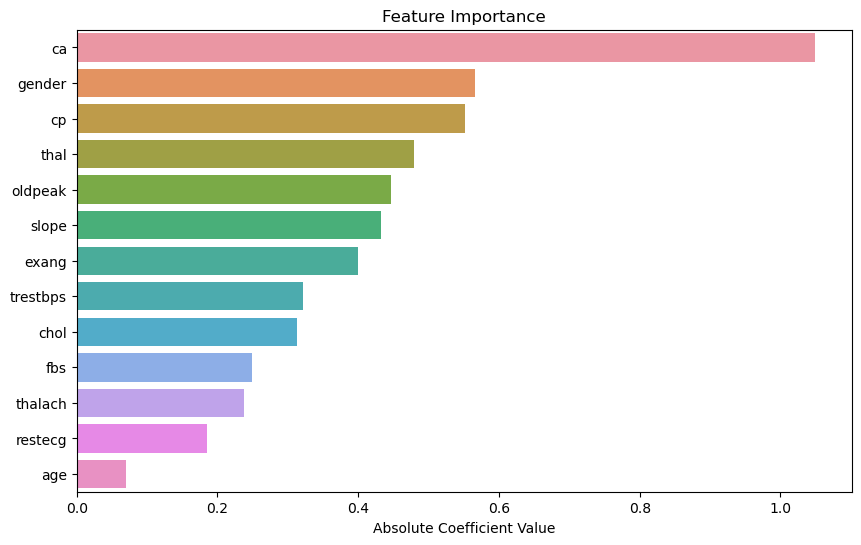

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel

# Load the dataset
heart_data = pd.read_csv('heart_disease.csv')

# EDA - Exploratory Data Analysis
print(heart_data.info())
print(heart_data.describe())
print(heart_data.head())

# Check for missing values
print(heart_data.isnull().sum())

# Treat missing values if any
# (In this example, let's fill missing values with the mean for simplicity)
heart_data.fillna(heart_data.mean(), inplace=True)

# Transform categorical data
label_encoder = LabelEncoder()
heart_data['gender'] = label_encoder.fit_transform(heart_data['gender'])

# Separate features and target variable
X = heart_data.drop('heart_diagnosis', axis=1)
y = heart_data['heart_diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Print model results
print("Accuracy on training set:", logreg_model.score(X_train, y_train))
print("Accuracy on test set:", logreg_model.score(X_test, y_test))

# Get feature importance
feature_importance = pd.Series(logreg_model.coef_[0], index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Absolute Coefficient Value")
plt.show()